In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
import sklearn
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r"C:\Users\gauri\Documents\JPMC - Quantitative Researcher\Task 3 and 4_Loan_Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
data.head(5)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [5]:
fico_data = data['fico_score'].values.reshape(-1,1)

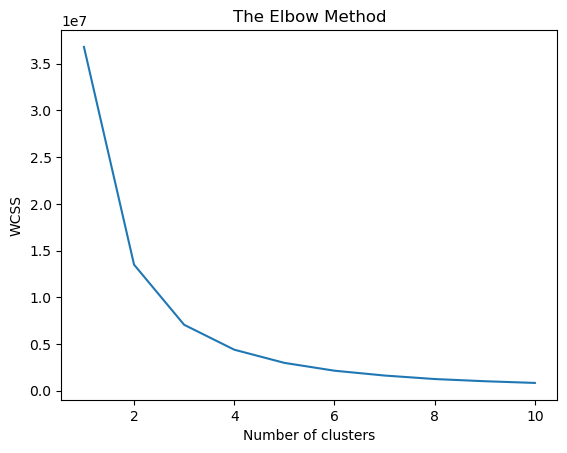

In [6]:
# Using the Elbow method to find optimal number of clusters k

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 42)
    km.fit(fico_data)
    wcss.append(km.inertia_)
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### Since the elbow method shows a sharp elbow point at 3, we determine k = 3

In [7]:
k=3
model = KMeans(n_clusters=k, n_init=10, random_state=42) 
data['fico_cluster'] = model.fit_predict(fico_data)

##### Rating Map

In [9]:
cluster_centers = np.sort(model.cluster_centers_.flatten())

rating_map = {center: i+1 for i, center in enumerate(cluster_centers)}
data['fico_rating'] = data['fico_cluster'].map(lambda x: rating_map[model.cluster_centers_[x][0]])

print(data[['fico_score', 'fico_rating']].head(20))

    fico_score  fico_rating
0          605            2
1          572            1
2          602            2
3          612            2
4          631            2
5          697            3
6          722            3
7          545            1
8          676            3
9          447            1
10         640            2
11         636            2
12         527            1
13         638            2
14         616            2
15         644            2
16         606            2
17         727            3
18         627            2
19         581            1
